In [1]:
#загрузка файлов
import pandas as pd

item_info = pd.read_csv('C:/Users/Aigerim/Downloads/AirPollutionSeoul/Original Data/Measurement_item_info.csv')
info = pd.read_csv('C:/Users/Aigerim/Downloads/AirPollutionSeoul/Original Data/Measurement_info.csv')
station_info = pd.read_csv('C:/Users/Aigerim/Downloads/AirPollutionSeoul/Original Data/Measurement_station_info.csv')
summary = pd.read_csv('C:/Users/Aigerim/Downloads/AirPollutionSeoul/Original Data/Measurement_summary.csv')


In [2]:
print('таблица: Measurement_info')
print('кол-во строк = ',info.shape[0], '\nкол-во полей = ', info.shape[1])
info.head()

таблица: Measurement_info
кол-во строк =  3885066 
кол-во полей =  5


,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [3]:
print('таблица: Measurement_item_info')
print('кол-во строк = ', item_info.shape[0], '\nкол-во полей = ', item_info.shape[1])
item_info.head()

таблица: Measurement_item_info
кол-во строк =  6 
кол-во полей =  7


,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [4]:
print('таблица: Measurement_station_info')
print('кол-во строк = ', station_info.shape[0], '\nкол-во полей = ', station_info.shape[1])
station_info.head()

таблица: Measurement_station_info
кол-во строк =  25 
кол-во полей =  5


,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [5]:
print('таблица: Measurement_summary')
print('кол-во строк = ',summary.shape[0], '\nкол-во полей = ', summary.shape[1])
summary.head()

таблица: Measurement_summary
кол-во строк =  647511 
кол-во полей =  11


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [6]:
info['Measurement date'] = pd.to_datetime(info['Measurement date']) #формат дата-время для поля

In [7]:
summary['Measurement date'] = pd.to_datetime(summary['Measurement date']) #формат дата-время для поля

In [43]:
summary.isnull().sum()#проверка на пустые значения

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [44]:
info.isnull().sum() #проверка на пустые значения

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64

### проверка гипотез: в будние дни загрязненность воздуха ниже, чем в выходные?

In [8]:
summary[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].describe()

,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


    алгоритм:
1) добавить поле "день недели" к summary 

2) summary разделить на две выборки "будни" и "выходные"

3) убрать дни недели и сгруппировать в средние значения по дням


In [9]:
summ2= summary.copy()

In [10]:
summ2['DayOfWeek'] = summ2['Measurement date'].dt.day_name() #добавим поле день недели

In [11]:
summ2.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,DayOfWeek
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,Sunday
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,Sunday
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,Sunday
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,Sunday
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,Sunday


In [12]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ends = ['Saturday', 'Sunday']#будем считать, суббота = выходной день

In [13]:
Weekdays = summ2[summ2['DayOfWeek'].isin(days)]
Weekdays

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,DayOfWeek
24,2017-01-02 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.057,0.002,1.1,93.0,72.0,Monday
25,2017-01-02 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.057,0.002,1.0,92.0,74.0,Monday
26,2017-01-02 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.055,0.002,1.0,90.0,73.0,Monday
27,2017-01-02 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.053,0.002,1.0,92.0,74.0,Monday
28,2017-01-02 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.052,0.002,1.1,92.0,76.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0,Tuesday
647507,2019-12-31 20:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0,Tuesday
647508,2019-12-31 21:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0,Tuesday
647509,2019-12-31 22:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0,Tuesday


In [14]:
Weekends = summ2[summ2['DayOfWeek'].isin(ends)]
Weekends

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,DayOfWeek
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,Sunday
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,Sunday
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,Sunday
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,Sunday
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
647458,2019-12-29 19:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.044,0.005,0.6,48.0,33.0,Sunday
647459,2019-12-29 20:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.043,0.007,0.6,44.0,32.0,Sunday
647460,2019-12-29 21:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.048,0.003,0.6,44.0,32.0,Sunday
647461,2019-12-29 22:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.041,0.006,0.6,48.0,35.0,Sunday


In [15]:
Weekends.drop(['Station code','Address','Latitude', 'Longitude','DayOfWeek'], axis=1, inplace=True)

C:\Users\Aigerim\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
Weekdays.drop(['Station code','Address','Latitude', 'Longitude','DayOfWeek'], axis=1, inplace=True)

In [17]:
days_mean = Weekdays.groupby(Weekdays['Measurement date'].dt.date,as_index=False).mean()

In [18]:
ends_mean = Weekends.groupby(Weekends['Measurement date'].dt.date,as_index=False).mean()#,as_index=False

In [19]:
days_mean

,SO2,NO2,O3,CO,PM10,PM2.5
0,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
1,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
2,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
3,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333
4,0.002792,0.033360,0.011063,0.528833,21.075000,13.251667
...,...,...,...,...,...,...
773,0.003448,0.046190,0.004773,0.883667,50.573333,37.296667
774,0.003485,0.032635,0.013362,0.650333,48.425000,36.055000
775,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333
776,0.003272,0.031195,0.012347,0.628500,38.031667,27.060000


In [20]:
ends_mean

,SO2,NO2,O3,CO,PM10,PM2.5
0,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,0.003355,0.047610,0.002950,0.876000,53.936667,37.175000
2,0.002745,0.030257,0.013413,0.588167,31.158333,21.725000
3,0.003950,0.012817,0.023657,0.418833,43.903333,11.641667
4,0.000640,0.018385,0.012785,1.076000,27.041667,13.590000
...,...,...,...,...,...,...
302,-0.036498,-0.000822,-0.032937,0.691167,38.776667,27.263333
303,0.003583,0.044182,0.003822,0.702667,34.768333,23.766667
304,0.003833,0.040048,0.008682,0.751167,61.923333,48.793333
305,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333


Воспользуемся гипотезой об однородности

H0: F = G

Альтернатива:

H1: F < G

In [21]:
#проверка на наличие нормального распределения (Тест Шапиро-Вилка)
from scipy import stats
print(stats.shapiro(ends_mean).pvalue)
print(stats.shapiro(days_mean).pvalue)      

0.0
0.0


Малое значение p-value означает "ненормальность" распределения выборок, не соответствуют нормальному закону распределения, при анализа гипотезы об однородности двух выборок придется применять непараметрические тесты.

тест Манна-Уитни, с уровнем значимости = 0.05

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [22]:
stats.mannwhitneyu(days_mean,ends_mean, alternative = 'greater')

MannwhitneyuResult(statistic=2391491.5, pvalue=0.0)

H0: F=G, H1: F<G,

результаты H0 значимы на 5% уровне, значит отвергаем гипотезу однородности (о том что загрязненность воздуха в будние и выходные дни одинаково), следовательно будни и выходные дни имеют разные распределения.

Альтернативу не отвергаем

Далее чтобы оценить разницу, вычислим их медианы и вычислим разницу.

In [23]:
round(days_mean.median(), 5)- round(ends_mean.median(), 5)# разница медиан между "будни" и "выходные"

SO2      0.00011
NO2      0.00314
O3      -0.00169
CO       0.00850
PM10    -0.00417
PM2.5   -0.22083
dtype: float64

результаты показывают, что PM2.5 больше в выходные дни (другие показатели примерно равны на уровне одной сотой), можно предположить, что в выходные немного повышена загрязненность воздуха.

Ответ на вопрос "в будние дни загрязненность воздуха ниже, чем в выходные?" : да

### Корреляционный анализ: есть ли связь между концентрацией SO2 и NO2:

In [24]:
round(summary['SO2'].corr(summary['NO2']),2)

0.71

Результат корреляции между полями значений SO2 и NO2 равен 0.71 (величина находится на отрезке  от 0,7 до 0,9, имеет высокую связь)

Больше нуля, следовательно прямо пропорциональная зависимость.

### Cвободный анализ + Визуализация

In [79]:
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from matplotlib.pyplot import figure

In [26]:
summ3 = summary.copy()

In [28]:
summ3.drop(['Longitude','Latitude','Address'], axis=1, inplace=True)

In [29]:
summ3

,Measurement date,Station code,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,101,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00:00,101,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00:00,101,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00:00,101,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00:00,101,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00:00,125,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00:00,125,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00:00,125,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00:00,125,0.003,0.040,0.004,0.5,25.0,18.0


In [30]:
summ_mean = summ3.groupby(summ3['Measurement date'].dt.date).mean()#,as_index=False
summ_mean

,Station code,SO2,NO2,O3,CO,PM10,PM2.5
Measurement date,,,,,,,
2017-01-01,113.0,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
2017-01-02,113.0,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2017-01-03,113.0,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
2017-01-04,113.0,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
2017-01-05,113.0,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333
...,...,...,...,...,...,...,...
2019-12-27,113.0,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333
2019-12-28,113.0,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333
2019-12-29,113.0,0.003337,0.037145,0.008980,0.641333,44.428333,27.306667


In [31]:
summ_mean.sort_values(by=['SO2','NO2','O3','CO','PM10','PM2.5']).head(10) 
#сортировка по возрастанию средних значений микроэлементов, которые входят в топ-10 дат,
#когда было минимальное загрязнение воздуха
#все топ-10 мест занимает станция под номером 113 (34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republic of Korea)
# видно, что сентябрь 2019 года и февраль 2018 года входят в топ-10

,Station code,SO2,NO2,O3,CO,PM10,PM2.5
Measurement date,,,,,,,
2019-09-22,113.0,-0.197990,-0.192415,-0.170202,0.022000,4.771667,3.951667
2019-09-21,113.0,-0.197662,-0.182800,-0.186468,0.088333,12.050000,5.668333
2019-09-23,113.0,-0.174233,-0.163583,-0.150953,0.083500,16.745000,8.095000
2019-09-24,113.0,-0.134855,-0.114867,-0.126393,0.221000,19.625000,9.480000
2019-09-20,113.0,-0.123797,-0.106975,-0.113425,0.212333,20.460000,9.790000
2019-09-26,113.0,-0.118005,-0.095798,-0.104707,0.381833,25.100000,14.370000
2019-09-25,113.0,-0.115717,-0.090308,-0.100733,0.435500,29.740000,17.541667
2018-02-27,113.0,-0.113703,-0.054088,-0.118412,0.878000,83.956667,54.553333
2019-09-06,113.0,-0.099496,-0.084661,-0.093176,0.253565,38.798261,7.563478


In [32]:
summ_mean.sort_values(by=['SO2','NO2','O3','CO','PM10','PM2.5'], ascending = [False,False,False,False,False,False]
                     ).head(10) 
#сортировка по убыванию средних значений микроэлементов, которые входят в топ-10 дат,
#когда было максимальное загрязнение воздуха
#все топ-10 мест занимает станция под номером 113 (34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republic of Korea)

,Station code,SO2,NO2,O3,CO,PM10,PM2.5
Measurement date,,,,,,,
2017-02-15,113.0,0.007523,0.059393,0.007595,0.928333,60.283333,41.085000
2018-01-16,113.0,0.007442,0.069288,0.004017,1.154833,111.758333,84.455000
2019-03-08,113.0,0.007387,0.035981,0.023046,0.812000,75.980952,30.390476
2017-05-08,113.0,0.007278,0.035040,0.044523,0.530000,173.441667,36.178333
2018-01-20,113.0,0.007242,0.047293,0.013315,0.896500,102.528333,63.515000
2018-02-09,113.0,0.007047,0.062843,0.005695,0.952667,68.380000,48.481667
2018-04-20,113.0,0.006983,0.059388,0.036390,0.730833,103.998333,70.026667
2017-11-28,113.0,0.006738,0.058995,0.003410,1.025667,71.026667,45.555000
2019-02-27,113.0,0.006737,0.052200,0.015547,0.757667,91.791667,48.423333


In [40]:
#максимальные значения для каждой станции
summ3.groupby(['Station code']).mean().sort_values(by=['SO2','NO2','O3','CO','PM10','PM2.5'], 
                                                   ascending = [False,False,False,False,False,False])

,SO2,NO2,O3,CO,PM10,PM2.5
Station code,,,,,,
119,0.004379,0.027845,0.023506,0.575693,50.550012,31.421488
114,0.004208,0.026576,0.024138,0.531365,40.416059,24.247520
115,0.003994,0.031279,0.021932,0.523653,42.684875,25.726529
125,0.003782,0.029101,0.021131,0.517889,45.323772,24.905073
107,0.003753,0.028103,0.018845,0.484076,49.850141,25.503302
117,0.003670,0.027590,0.025665,0.408613,51.500772,30.817241
118,0.003664,0.030602,0.023395,0.492271,39.956493,24.893221
101,0.003300,0.030516,0.023518,0.583764,37.965605,22.850454
102,0.003281,0.031941,0.024257,0.504389,37.970469,22.867169


In [181]:
#карта станций:
m = folium.Map(location=[37.541, 126.986], zoom_start=11) 
for index, row in station_info.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        popup=row['Station name(district)']+ ', Station №'+str(row['Station code' ]),
                        fill_color="#3db7e4", 
                       ).add_to(m)
m

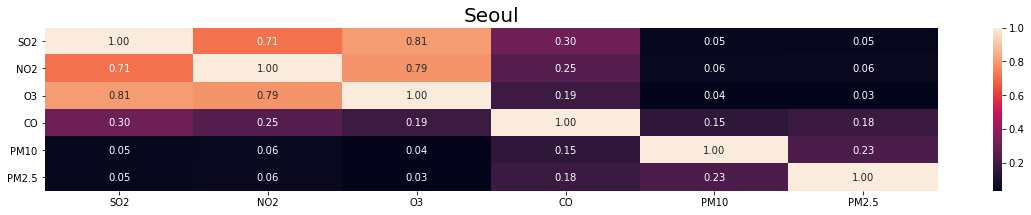

In [146]:
#корреляция элементов между собой
sns.heatmap(summ3.corr(), annot=True, fmt='0.2f')
plt.title('Seoul', fontsize=20)
plt.show()
# наблюдается высокая корреляция между (О3 , SO2)=0.81 и (О3 , NO2)=0.79 

In [77]:
summ3.drop(['Station code'], axis=1, inplace=True)

In [118]:
date2017 = summ3[(summ3['Measurement date'] >= '2017-01-01 00:00:00') & (summ3['Measurement date'] <= '2017-12-31 23:00:00')]
date2018= summ3[(summ3['Measurement date'] >= '2018-01-01 00:00:00') & (summ3['Measurement date'] <= '2018-12-31 23:00:00')]
date2019 = summ3[(summ3['Measurement date'] >= '2019-01-01 00:00:00') & (summ3['Measurement date'] <= '2019-12-31 23:00:00')]


In [124]:
date2017_mean = date2017.groupby(date2017['Measurement date'].dt.date).mean()
date2018_mean = date2018.groupby(date2018['Measurement date'].dt.date).mean()
date2019_mean = date2019.groupby(date2019['Measurement date'].dt.date).mean()

In [138]:
date2017_pm = date2017_mean.copy()
date2017_pm.drop(['SO2','NO2','O3','CO'], axis=1, inplace=True)
date2018_pm = date2018_mean.copy()
date2018_pm.drop(['SO2','NO2','O3','CO'], axis=1, inplace=True)
date2019_pm = date2019_mean.copy()
date2019_pm.drop(['SO2','NO2','O3','CO'], axis=1, inplace=True)

<AxesSubplot:title={'center':'средние показатели PM2.5 и PM10 за 2017 год'}, xlabel='Measurement date'>

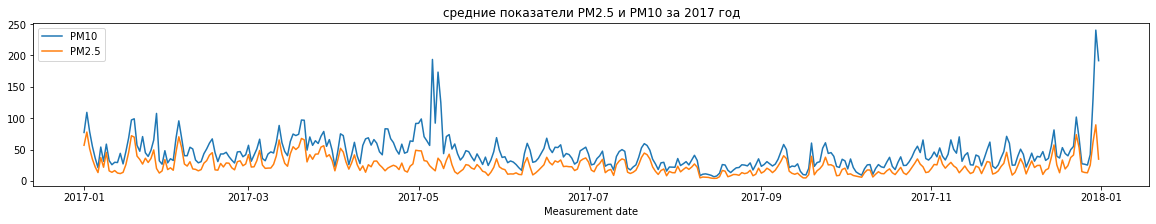

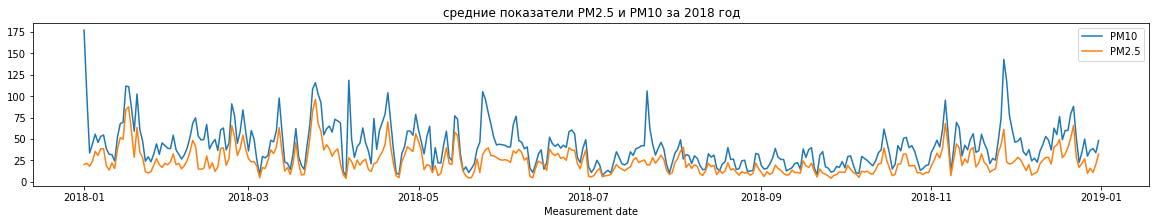

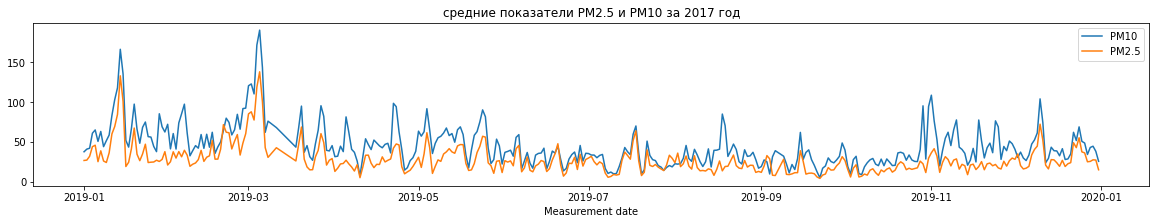

In [140]:
date2017_pm.plot(legend=True, title='средние показатели PM2.5 и PM10 за 2017 год')
date2018_pm.plot(legend=True, title='средние показатели PM2.5 и PM10 за 2018 год')
date2019_pm.plot(legend=True, title='средние показатели PM2.5 и PM10 за 2017 год')

In [141]:
monthly_mean = summary.groupby(summary['Measurement date'].dt.month).mean()
monthly_mean.drop(['Station code', 'Latitude', 'Longitude'], axis=1, inplace=True)
monthly_mean.rename_axis('Month', inplace=True)
monthly_mean.head(12)

,SO2,NO2,O3,CO,PM10,PM2.5
Month,,,,,,
1,0.004101,0.034953,0.012058,0.694777,59.450578,35.151950
2,0.001076,0.030486,0.013451,0.637079,52.757599,32.366468
3,-0.001083,0.032783,0.022926,0.584204,61.500099,40.796490
4,0.003021,0.029384,0.030441,0.478092,50.501028,25.538175
5,0.003237,0.025738,0.036532,0.453119,54.043716,26.553208
6,0.003342,0.022041,0.037392,0.416344,38.039630,24.378741
7,-0.000310,0.015266,0.022518,0.387508,30.265274,20.736572
8,0.002500,0.017162,0.026599,0.388227,26.948348,16.215528
9,-0.025448,-0.007608,-0.004274,0.381080,26.804168,15.341071


C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aigerim

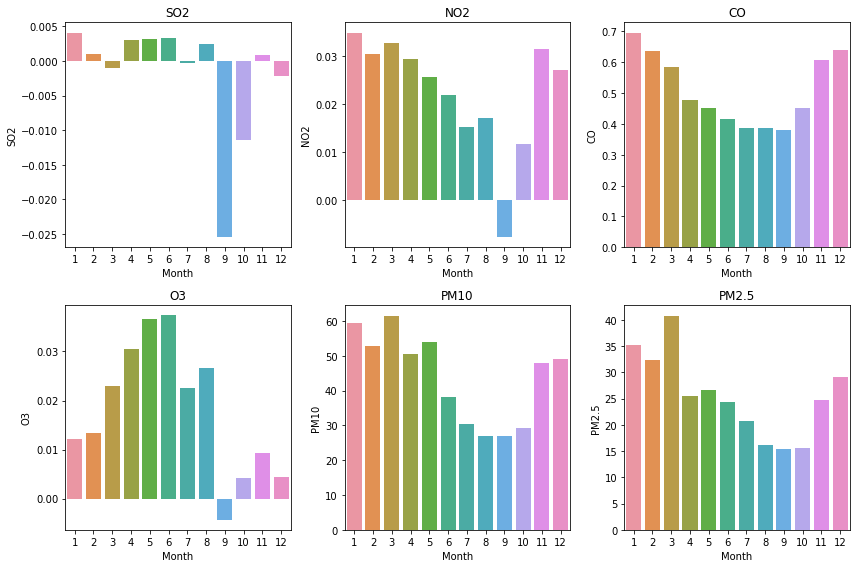

In [152]:
fig, axs = plt.subplots(2,3, figsize=(12,8), tight_layout=True)
sns.barplot(monthly_mean.index, monthly_mean['SO2'], ax=axs[0,0]).set_title('SO2')
sns.barplot(monthly_mean.index, monthly_mean['NO2'], ax=axs[0,1]).set_title('NO2')
sns.barplot(monthly_mean.index, monthly_mean['CO'], ax=axs[0,2]).set_title('CO')
sns.barplot(monthly_mean.index, monthly_mean['O3'], ax=axs[1,0]).set_title('O3')
sns.barplot(monthly_mean.index, monthly_mean['PM10'], ax=axs[1,1]).set_title('PM10')
sns.barplot(monthly_mean.index, monthly_mean['PM2.5'], ax=axs[1,2]).set_title('PM2.5')
plt.show()
# результаты: в среднем (за 2017-2019 года) наименьшая загрязненность воздуха наблюдается в сентябре.

In [156]:
summ4 = summary.copy()

In [158]:
summ4['Year'] = summ4['Measurement date'].dt.year

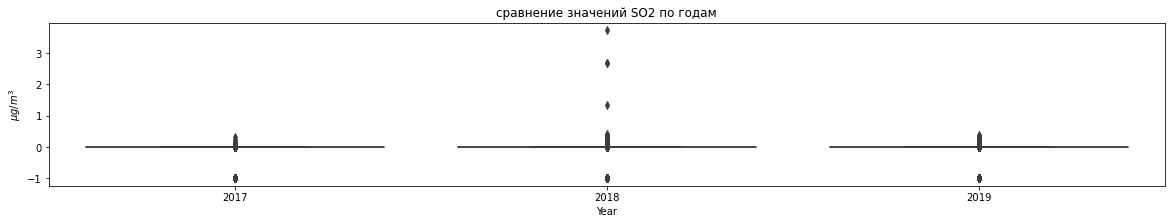

In [169]:
sns.boxplot(x=summ4['Year'], y=summ4['SO2']);
plt.xlabel('Year')
plt.ylabel('$\mu g/m^3$')
plt.title('сравнение значений SO2 по годам');

C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


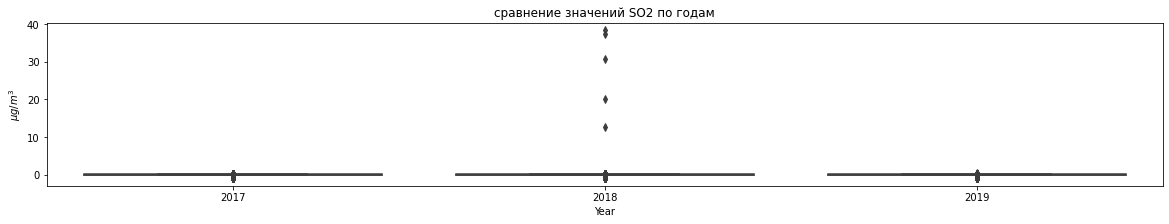

In [171]:
sns.boxplot(summ4['Year'], summ4['NO2'])

plt.xlabel('Year')
plt.ylabel('$\mu g/m^3$')
plt.title('сравнение значений SO2 по годам');

C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


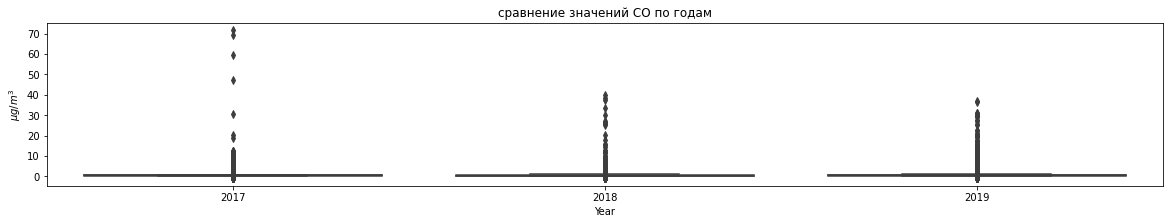

In [176]:
sns.boxplot(summ4['Year'], summ4['CO'])
plt.xlabel('Year')
plt.ylabel('$\mu g/m^3$')
plt.title('сравнение значений CO по годам');

C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


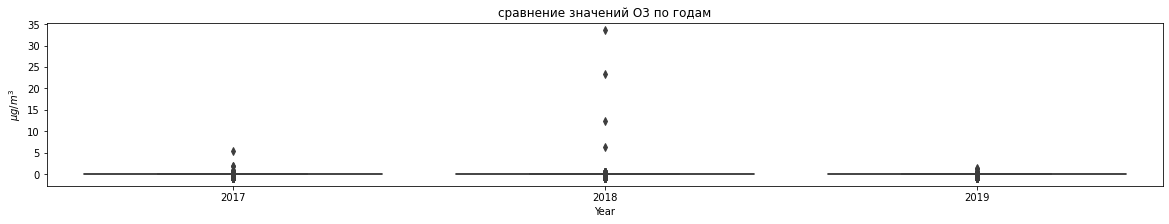

In [177]:
sns.boxplot(summ4['Year'], summ4['O3'])
plt.xlabel('Year')
plt.ylabel('$\mu g/m^3$')
plt.title('сравнение значений O3 по годам');

C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


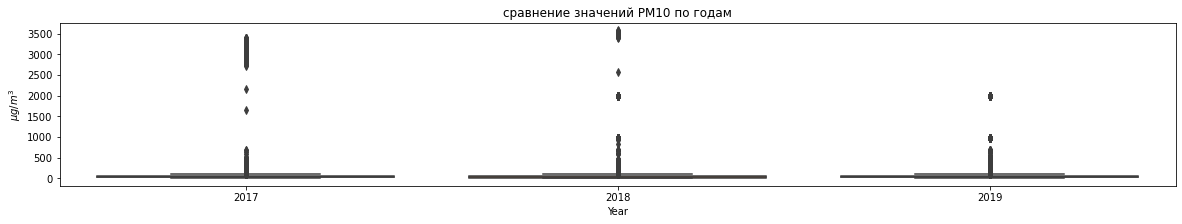

In [178]:
sns.boxplot(summ4['Year'], summ4['PM10'])
plt.xlabel('Year')
plt.ylabel('$\mu g/m^3$')
plt.title('сравнение значений PM10 по годам');

C:\Users\Aigerim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


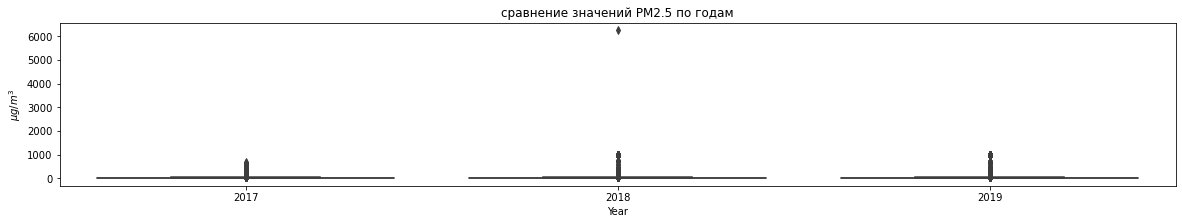

In [179]:
sns.boxplot(summ4['Year'], summ4['PM2.5'])
plt.xlabel('Year')
plt.ylabel('$\mu g/m^3$')
plt.title('сравнение значений PM2.5 по годам');

In [180]:
summ4 = summ4.groupby(['Year']).agg({'SO2': 'mean', 'NO2': 'mean', 
                                     'O3': 'mean', 'CO': 'mean', 'PM10': 'mean', 'PM2.5': 'mean'})

summ4
# средние значения элементов по годам в виде таблицы

,SO2,NO2,O3,CO,PM10,PM2.5
Year,,,,,,
2017,0.003205,0.027870,0.023104,0.517864,44.379726,24.565429
2018,-0.001097,0.023507,0.018097,0.494565,41.765160,24.132342
2019,-0.007751,0.015891,0.012498,0.515432,45.036843,27.634511
